In [1]:
# パッケージのインポート
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
# 設定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format

In [16]:
df_train = pd.read_csv('../200_input/train.csv')
df_tenki = pd.read_csv('../200_input/tenki.csv')

In [21]:
display(df_train['nichi'].min())
display(df_train['nichi'].max())
display(df_tenki['nichi'].min())
display(df_tenki['nichi'].max())

20180301

20200529

20180301

20200630

In [17]:
df_train.head()

,nichi,group_mise,group_item,target
0,20180301,X,A,183
1,20180301,X,B,22
2,20180301,X,C,8
3,20180301,X,D,13
4,20180301,X,E,162


In [18]:
df_tenki

,nichi,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru
0,20180301,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10
1,20180302,14,6,10,9,13,9,0,0,0,0,0,0,0,0,10,20,10,10
2,20180303,15,5,10,6,14,12,0,0,0,0,0,0,0,0,20,20,10,20
3,20180304,20,8,15,11,19,16,0,0,0,0,0,0,0,0,10,20,10,10
4,20180305,18,10,16,16,17,16,38,0,9,29,10,0,5,5,30,20,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,20200626,32,20,26,21,31,27,0,0,0,0,0,0,0,0,20,20,10,20
849,20200627,30,23,26,24,27,26,0,0,0,0,0,0,0,0,20,20,10,20
850,20200628,25,21,23,23,23,22,75,51,24,0,11,8,3,0,30,30,30,20
851,20200629,29,20,25,23,28,24,0,0,0,0,0,0,0,0,10,10,10,20


In [30]:
df_tenki['kion_sa'] = df_tenki['kion_max'] - df_tenki['kion_min']

In [31]:
df_tenki.tail(3)

,nichi,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru,kion_sa
850,20200628,25,21,23,23,23,22,75,51,24,0,11,8,3,0,30,30,30,20,4
851,20200629,29,20,25,23,28,24,0,0,0,0,0,0,0,0,10,10,10,20,9
852,20200630,27,22,25,24,26,25,10,0,7,3,4,0,2,2,30,20,30,30,5


In [32]:
df_merge = pd.merge(df_train, df_tenki, on=['nichi'], how='left')

In [33]:
df_merge

,nichi,group_mise,group_item,target,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru,kion_sa
0,20180301,X,A,183,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
1,20180301,X,B,22,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
2,20180301,X,C,8,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
3,20180301,X,D,13,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
4,20180301,X,E,162,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,20200529,Z,A,40,27,16,21,19,25,21,0,0,0,0,0,0,0,0,10,10,10,10,11
7985,20200529,Z,B,17,27,16,21,19,25,21,0,0,0,0,0,0,0,0,10,10,10,10,11
7986,20200529,Z,C,18,27,16,21,19,25,21,0,0,0,0,0,0,0,0,10,10,10,10,11
7987,20200529,Z,D,15,27,16,21,19,25,21,0,0,0,0,0,0,0,0,10,10,10,10,11


In [49]:
df_merge_xe = df_merge[(df_merge['group_mise'] == 'X') & (df_merge['group_item'] == 'E')].reset_index(drop=True)

In [50]:
df_merge_xe

,nichi,group_mise,group_item,target,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru,kion_sa
0,20180301,X,E,162,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10,14
1,20180302,X,E,183,14,6,10,9,13,9,0,0,0,0,0,0,0,0,10,20,10,10,8
2,20180305,X,E,142,18,10,16,16,17,16,38,0,9,29,10,0,5,5,30,20,30,30,8
3,20180306,X,E,187,11,6,9,8,10,8,1,1,0,0,1,1,0,0,30,30,10,10,5
4,20180307,X,E,208,9,4,6,5,7,6,0,0,0,0,0,0,0,0,20,20,20,20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,20200525,X,E,22,26,18,21,20,25,21,0,0,0,0,0,0,0,0,20,10,10,20,8
538,20200526,X,E,22,26,20,21,21,23,21,0,0,0,0,0,0,0,0,20,20,20,20,6
539,20200527,X,E,25,27,19,22,20,25,23,0,0,0,0,0,0,0,0,10,20,10,10,8
540,20200528,X,E,21,26,19,21,21,24,21,0,0,0,0,0,0,0,0,20,20,10,20,7


In [64]:
df_plot = df_merge_xe[['nichi', 'target', 'kion_ave']].set_index('nichi')

In [72]:
num_list =[]
for i in range(542):
    num_list.append(i)

In [76]:
len(num_list)

542

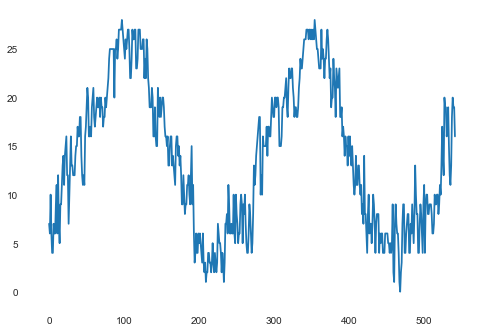

In [79]:
plt.plot(num_list, y2)

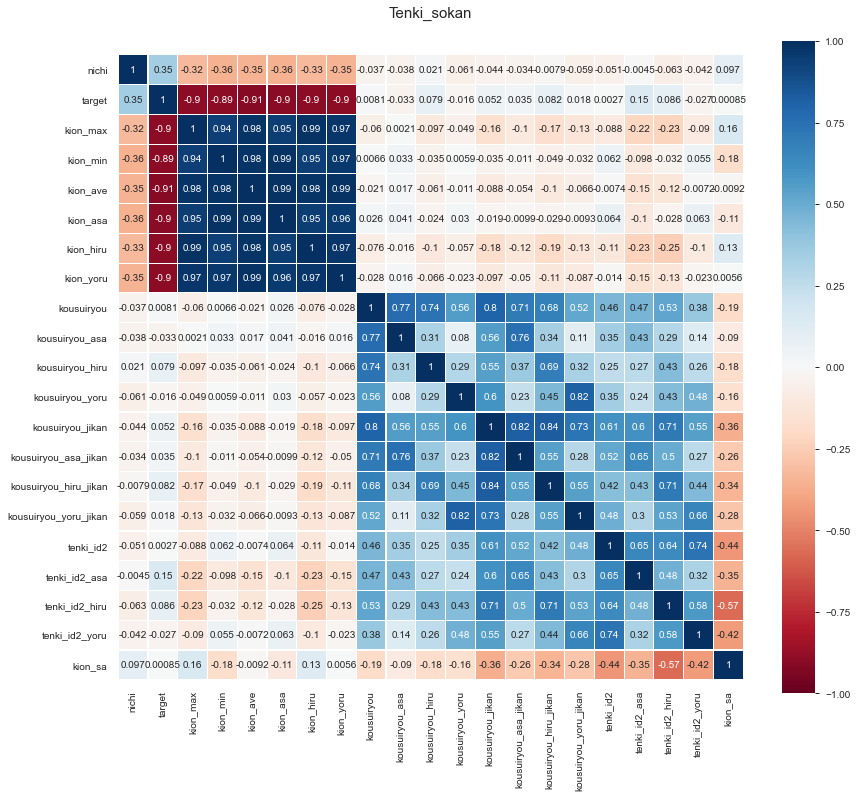

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Tenki_sokan', y=1.05, size=15)
sns.heatmap(df_merge_xe.select_dtypes(exclude='object').astype(int).corr(),linewidths=0.1,vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)